(c) 2022 Manuel Razo. This work is licensed under a [Creative Commons
Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/).
All code contained herein is licensed under an [MIT
license](https://opensource.org/licenses/MIT).

In [1]:
# Finding project home directory directory

# Save current directory
dir = read(`pwd`, String)
dir = dir[1:end-1]

# Load package for project by locating git home folder
home_dir = read(`git rev-parse --show-toplevel`, String)
home_dir = home_dir[1:end-1]

# Change directories
cd(home_dir * "/jlStatGen")
# Activate environment
using Pkg
Pkg.pkg"activate ."

# Return to original directory
cd(dir)

┌ Warning: The Pkg REPL mode is intended for interactive use only, and should not be used from scripts. It is recommended to use the functional API instead.
└ @ Pkg.REPLMode /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.7/Pkg/src/REPLMode/REPLMode.jl:377
  Activating

 project at `~/git/stat_gen/jlStatGen`


In [2]:
# Import project package
import jlStatGen

# Import basic math
import LinearAlgebra

# Load CairoMakie for plotting
using CairoMakie
import ColorSchemes
# Activate backend
CairoMakie.activate!()

# Set PBoC Plotting style
jlStatGen.viz.pboc_makie!()

# Define output directory
output_dir = "$home_dir/book/figures/forces_evolution";

# The Forces of Evolution

## Deterministic Forces

### Mutation

Plotting allele frequency $x(t)$ as a function of time $t$. The solution to the
differential equation is of the form
$$
x(t) = \frac{\mu_{a\rightarrow A}}
{\mu_{a\rightarrow A} + \mu_{A\rightarrow a}} 
- \frac{\left[  \mu_{a\rightarrow A} - (\mu_{a\rightarrow A} + 
\mu_{A\rightarrow a}) x_o \right] 
\mathrm{e}^{- (\mu_{a\rightarrow A} + \mu_{A\rightarrow a}) t}}
{\mu_{a\rightarrow A} + \mu_{A\rightarrow a}}.
$$

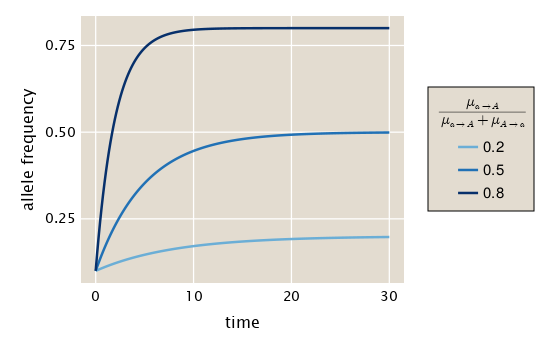

In [21]:
# Define ranges of mutations to chose
μAa = 0.1
μaA_array = [
    µAa * 0.2 / (1 - 0.2), µAa * 0.5 / (1 - 0.5), µAa * 0.8 / (1 - 0.8)
]
# μaA_array = [µAa * 0.2, µAa * 0.01, µAa * 0.8]

# Define initial frequency
xₒ  = 0.1

# Define range of time to evaluate
time = LinRange(0, 30, 200)

# Set figure resolution
figres = 350

# Inititalize figure
fig = Figure(resolution=(figres + 200, figres))

# Add axis
ax = Axis(
    fig[1, 1],
    xlabel="time",
    ylabel="allele frequency",
)

# Define colors
color = get(ColorSchemes.Blues_9, LinRange(0.5, 1, length(µaA_array)))

# Loop through selection coefficients
for (i, µaA) in enumerate(µaA_array)
    # Evaluate allele frequency
    x = @. µaA / (µaA + µAa) - 
    ((µaA - (µaA + µAa) * xₒ) * exp(-(µaA + µAa) * time)) / (µaA + µAa)
    
    # Plot time vs allele frequency
    lines!(
        ax, 
        time, 
        x, 
        color=color[i], 
        linewidth=2.5, 
        label="$(round(µaA / (µaA + µAa), sigdigits=2))"
    )
end # for

Legend(
    fig[1, 2], 
    ax, 
    L"\frac{\mu_{a\rightarrow A}}{\mu_{a\rightarrow A} + \mu_{A\rightarrow a}} "
)

# Save figure as png
save("$output_dir/_mutation_dynamics.png", fig)
# Define figure size in inches
size_in_inches = 3
# Define size for pdf
size_pt = 72 * size_in_inches
# Safe figure as pdf
save(
    "$output_dir/_mutation_dynamics.pdf",
    fig,
    pt_per_unit=size_pt / figres,
)

fig